### Line plot for each test dataset
y: Accuracy, x: training set size

#### Zero shot

In [24]:
from utils import load_scores_per_dataset_all_models_all_fractions

scores = load_scores_per_dataset_all_models_all_fractions(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    metric="Top1Accuracy")

for dataset, model_scores in scores.items():
    model_scores.pop("SimCLR", 0)
    model_scores.pop("SimCLR + ITM", 0)

['0.05' '0.1' '0.2' '0.4' '0.6' '0.8' '1-aug' '1.0' '1.384']
Error: Caltech101, SimCLR, 0.05
Error: Caltech101, SimCLR, 0.1
Error: Caltech101, SimCLR + ITM, 0.05
Error: Caltech101, SimCLR + ITM, 0.1
Error: Caltech256, SimCLR, 0.05
Error: Caltech256, SimCLR, 0.1
Error: Caltech256, SimCLR + ITM, 0.05
Error: Caltech256, SimCLR + ITM, 0.1
Error: CIFAR10, SimCLR, 0.05
Error: CIFAR10, SimCLR, 0.1
Error: CIFAR10, SimCLR + ITM, 0.05
Error: CIFAR10, SimCLR + ITM, 0.1
Error: CIFAR100, SimCLR, 0.05
Error: CIFAR100, SimCLR, 0.1
Error: CIFAR100, SimCLR + ITM, 0.05
Error: CIFAR100, SimCLR + ITM, 0.1
Error: DTD, SimCLR, 0.05
Error: DTD, SimCLR, 0.1
Error: DTD, SimCLR + ITM, 0.05
Error: DTD, SimCLR + ITM, 0.1
Error: FGVCAircraft, SimCLR, 0.05
Error: FGVCAircraft, SimCLR, 0.1
Error: FGVCAircraft, SimCLR + ITM, 0.05
Error: FGVCAircraft, SimCLR + ITM, 0.1
Error: Food101, SimCLR, 0.05
Error: Food101, SimCLR, 0.1
Error: Food101, SimCLR + ITM, 0.05
Error: Food101, SimCLR + ITM, 0.1
Error: OxfordIIITPet, Sim

In [3]:
scores

{'Caltech101': {'CLIP + ITM': [0.0759256556630134,
   0.1308168917894363,
   0.1924794763326645,
   0.3060077726840973,
   0.351534366607666,
   0.3950439393520355,
   0.4747154712677002,
   0.4369687438011169],
  'CLIP': [0.0734764412045478,
   0.1273591667413711,
   0.2482351213693618,
   0.2757527828216553,
   0.3122028410434723,
   0.3583057224750519,
   0.4228497445583343,
   0.3924506604671478],
  'CLIP + SimCLR + ITM': [0.0076357871294021,
   0.2155309021472931,
   0.2009796798229217,
   0.2845411300659179,
   0.3109062016010284,
   0.4234260320663452,
   0.4263074398040771,
   0.4175190925598144],
  'CLIP + SimCLR': [0.0046102865599095,
   0.0070595014840364,
   0.2305143326520919,
   0.262065976858139,
   0.3652211427688598,
   0.3600345849990845,
   0.4232819378376007,
   0.4477740824222564]},
 'Caltech256': {'CLIP + ITM': [0.0518684908747673,
   0.0956912413239479,
   0.1525423675775528,
   0.229732483625412,
   0.2893199920654297,
   0.3104757964611053,
   0.346538692712783

In [17]:
color_palette = sns.color_palette("bright")
color_palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

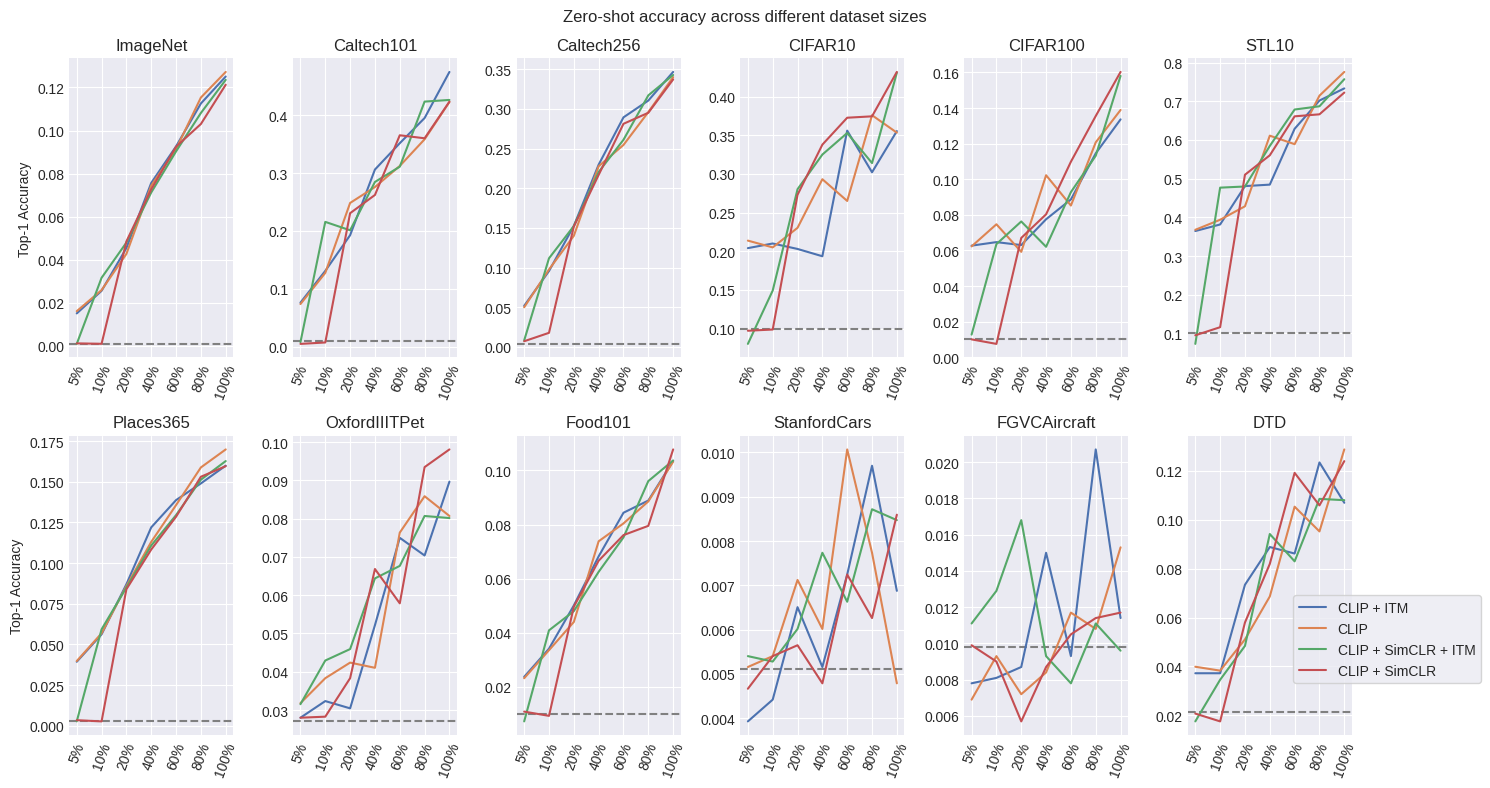

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
# plt.style.use("seaborn-v0_8-bright")

figtitle = "Zero-shot accuracy across different dataset sizes"
ylabel = "Top-1 Accuracy"
colors = sns.color_palette("deep", 4)
# CLIP = red, ITM = green, SimCLR = blue
# color_palette = sns.color_palette("bright")
#colors = {"CLIP": 'r', "CLIP + ITM": 'y', "CLIP + SimCLR": 'm', "CLIP + SimCLR + ITM": 'k'}
# colors = {"CLIP": color_palette[3], 
#           "CLIP + ITM": color_palette[8], 
#           "CLIP + SimCLR": color_palette[6], 
#           "CLIP + SimCLR + ITM": color_palette[7]
#           }
width = 0.2
baselines = {
    "ImageNet": 1/1000.,
    # "ImageNet-100-0.1": 1/100.,
    # "ImageNet-100-0.01": 1/100.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'STL10': 1./10,
    'Places365': 1./365,
    'OxfordIIITPet':1./37,
    'Food101': 1./101,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,    
    'DTD':1/47.,
}

fig, axs = plt.subplots(2, 6, figsize=(15, 8))
# fig.delaxes(axs.flat[13])
fig.suptitle(figtitle)
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)
datasets = scores.keys()
dataset_sizes = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0", ]
dataset_sizes = ["5%", "10%", "20%", "40%", "60%", "80%", "100%"]

# for mind, model_id in enumerate(data_all_models.keys()):
# for sind, dataset in enumerate(scores.keys()):
for sind, dataset in enumerate(baselines.keys()):
    axs.flat[sind].set_title(dataset)
    axs.flat[sind].set_xticks(range(len(dataset_sizes)), dataset_sizes, rotation=70)
    axs.flat[sind].axhline(baselines[dataset],linestyle='dashed',color='gray')
    for idx, (model, y) in enumerate(scores[dataset].items()):
        y = y[:-1]
        axs.flat[sind].plot(y, c=colors[idx], label=model)
        # axs.flat[sind].plot(y, c=colors[model], label=model)

plt.legend(bbox_to_anchor=(0.6, 0.15), loc="lower left", frameon=True)
# Move the legend outside the plot
# handles, labels = axs.flat[0].get_legend_handles_labels()
# fig.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

fig.tight_layout()        
# Adjust layout to make space for the legend
# fig.tight_layout(rect=[0, 0, 0.85, 1])
# fig.subplots_adjust(right=0.85, wspace=0.4)

#### Linear probe

In [29]:
from utils import load_scores_per_dataset_all_models_all_fractions

scores = load_scores_per_dataset_all_models_all_fractions(
    "/home/phisch/multimodal/test_results/model_scores_linear_probe.csv",
    method="linear",
    method_notes="last_image_layer",
    metric="Top1Accuracy")

['0.05' '0.1' '0.2' '0.4' '0.6' '0.8' '1-aug' '1.0' '1.384']


In [30]:
scores

{'ImageNet-100-0.1': {'CLIP + SimCLR': [0.3230000138282776,
   0.3156000077724457,
   0.4803999960422516,
   0.5519999861717224,
   0.5902000069618225,
   0.6208000183105469,
   0.63919997215271,
   0.6794000267982483],
  'CLIP + SimCLR + ITM': [0.3190000057220459,
   0.425599992275238,
   0.4805999994277954,
   0.5594000220298767,
   0.5974000096321106,
   0.6172000169754028,
   0.646399974822998,
   0.6710000038146973],
  'CLIP + ITM': [0.2635999917984009,
   0.3431999981403351,
   0.4758000075817108,
   0.5473999977111816,
   0.5996000170707703,
   0.6100000143051147,
   0.635200023651123,
   0.6787999868392944],
  'SimCLR + ITM': [0.3212000131607055,
   0.3176000118255615,
   0.321399986743927,
   0.3237999975681305,
   0.3251999914646148,
   0.3177999854087829,
   0.3147999942302704,
   0.324999988079071],
  'CLIP': [0.2635999917984009,
   0.3398000001907348,
   0.4569999873638153,
   0.5473999977111816,
   0.5929999947547913,
   0.6222000122070312,
   0.6449999809265137,
   0.675

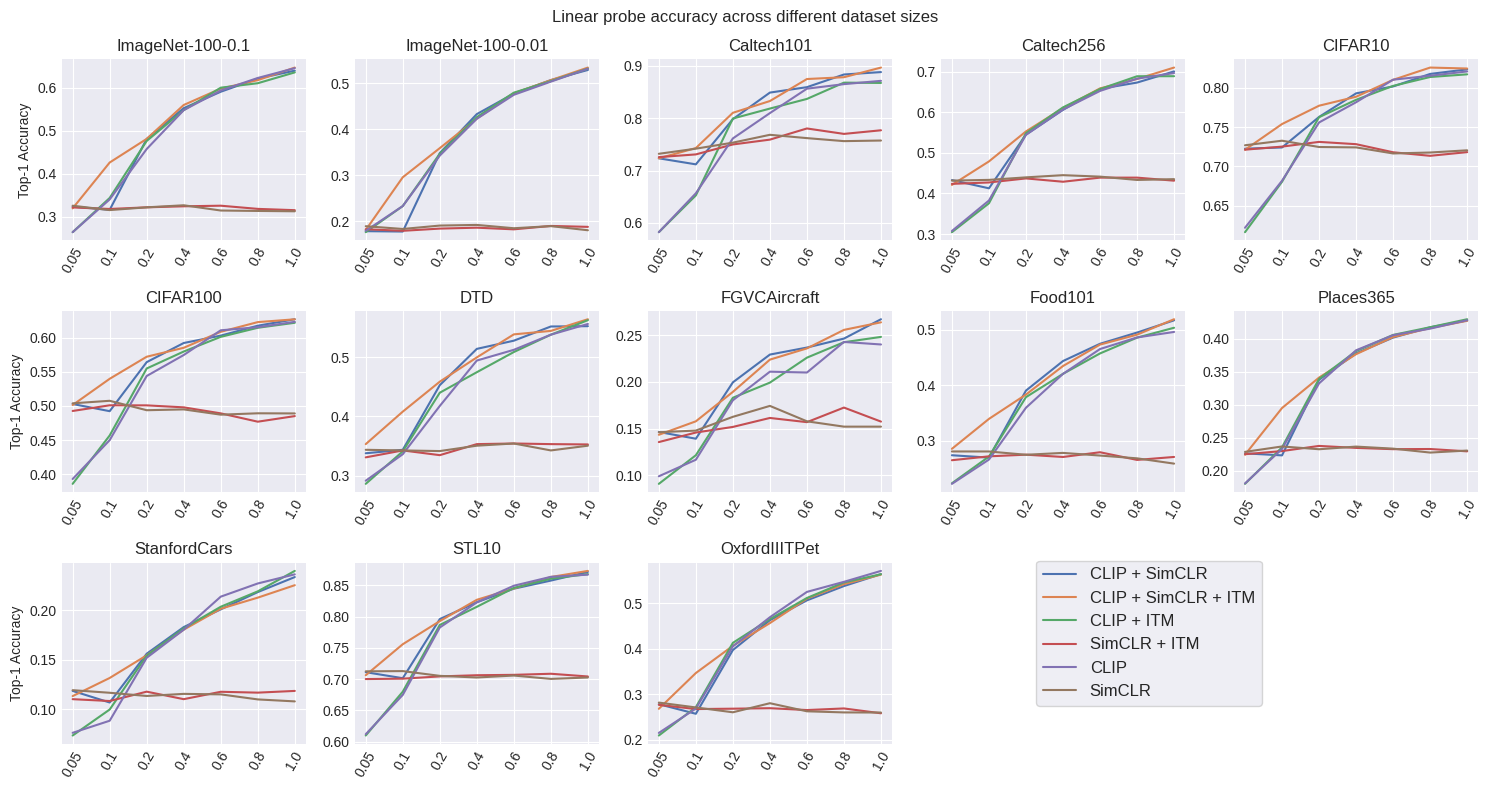

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

figtitle = "Linear probe accuracy across different dataset sizes"
ylabel = "Top-1 Accuracy"
num_models = 6
colors = sns.color_palette("deep", num_models)
width = 0.2
baselines = {
    "ImageNet-100-0.1": 1/100.,
    "ImageNet-100-0.01": 1/100.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'STL10': 1./10,
    'Places365': 1./365,
    'OxfordIIITPet':1./37,
    'Food101': 1./101,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'DTD':1/47.,
}

fig, axs = plt.subplots(3, 5, figsize=(15, 8))
fig.delaxes(axs.flat[14])
fig.delaxes(axs.flat[13])
fig.suptitle(figtitle)
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)
axs[2,0].set_ylabel(ylabel)
datasets = scores.keys()
dataset_sizes = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0"]

# for mind, model_id in enumerate(data_all_models.keys()):
for sind, dataset in enumerate(scores.keys()):
    axs.flat[sind].set_title(dataset)
    axs.flat[sind].set_xticks(range(len(dataset_sizes)), dataset_sizes, rotation=60)
    # axs.flat[sind].axhline(baselines[dataset],linestyle='dashed',color='gray')
    for idx, (model, y) in enumerate(scores[dataset].items()):
        y = y[:-1]
        axs.flat[sind].plot(y, c=colors[idx], label=model)#, marker='.')

# plt.legend(bbox_to_anchor=(1.05, 1))
# Move the legend outside the plot
# Add a legend to the empty space
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.75, 0.1, 0.1, 0.1), frameon=True, prop={'size': 12})
# fig.legend(loc='center', bbox_to_anchor=(0.85, 0.1, 0.1, 0.1))

fig.tight_layout()        
# Adjust layout to make space for the legend
# fig.tight_layout(rect=[0, 0, 0.85, 1])
# fig.subplots_adjust(right=0.85, wspace=0.4)

### Zero-shot accuracy across text encoder layers

In [1]:
from omegaconf import OmegaConf
from utils import zero_shot_text_layers_load_scores_per_dataset

data = zero_shot_text_layers_load_scores_per_dataset(
    "/home/phisch/multimodal/test_results/model_scores_zero_shot_text_layers.csv",
)

model_id_mapping = OmegaConf.load("/home/phisch/multimodal/configs/checkpoints/model_id_mapping.yaml")
model_names = ["CLIP + SimCLR", "CLIP + SimCLR + ITM", "CLIP + ITM", "CLIP"]
accuracy = "Top1Accuracy"

In [2]:
data

{'CIFAR10': {'CLIP + SimCLR + ITM': [0.1254000067710876,
   0.1940000057220459,
   0.4329000115394592,
   0.4101000130176544,
   0.2492000013589859,
   0.2976999878883362,
   0.2876000106334686,
   0.3488999903202057,
   0.3490999937057495,
   0.4007000029087066,
   0.4447999894618988,
   0.4498000144958496],
  'CLIP + ITM': [0.1510999947786331,
   0.1254999935626983,
   0.3025000095367431,
   0.305400013923645,
   0.2468000054359436,
   0.3203999996185303,
   0.386599987745285,
   0.418500006198883,
   0.3828999996185303,
   0.3847000002861023,
   0.3465000092983246,
   0.3632999956607818],
  'CLIP': [0.130400002002716,
   0.1756000071763992,
   0.4226000010967254,
   0.4154999852180481,
   0.210999995470047,
   0.3122999966144562,
   0.3815000057220459,
   0.3725000023841858,
   0.4061000049114227,
   0.4156999886035919,
   0.4494999945163727,
   0.4735000133514404],
  'CLIP + SimCLR': [0.1653999984264373,
   0.1852999925613403,
   0.4422000050544739,
   0.4083000123500824,
   0.2000

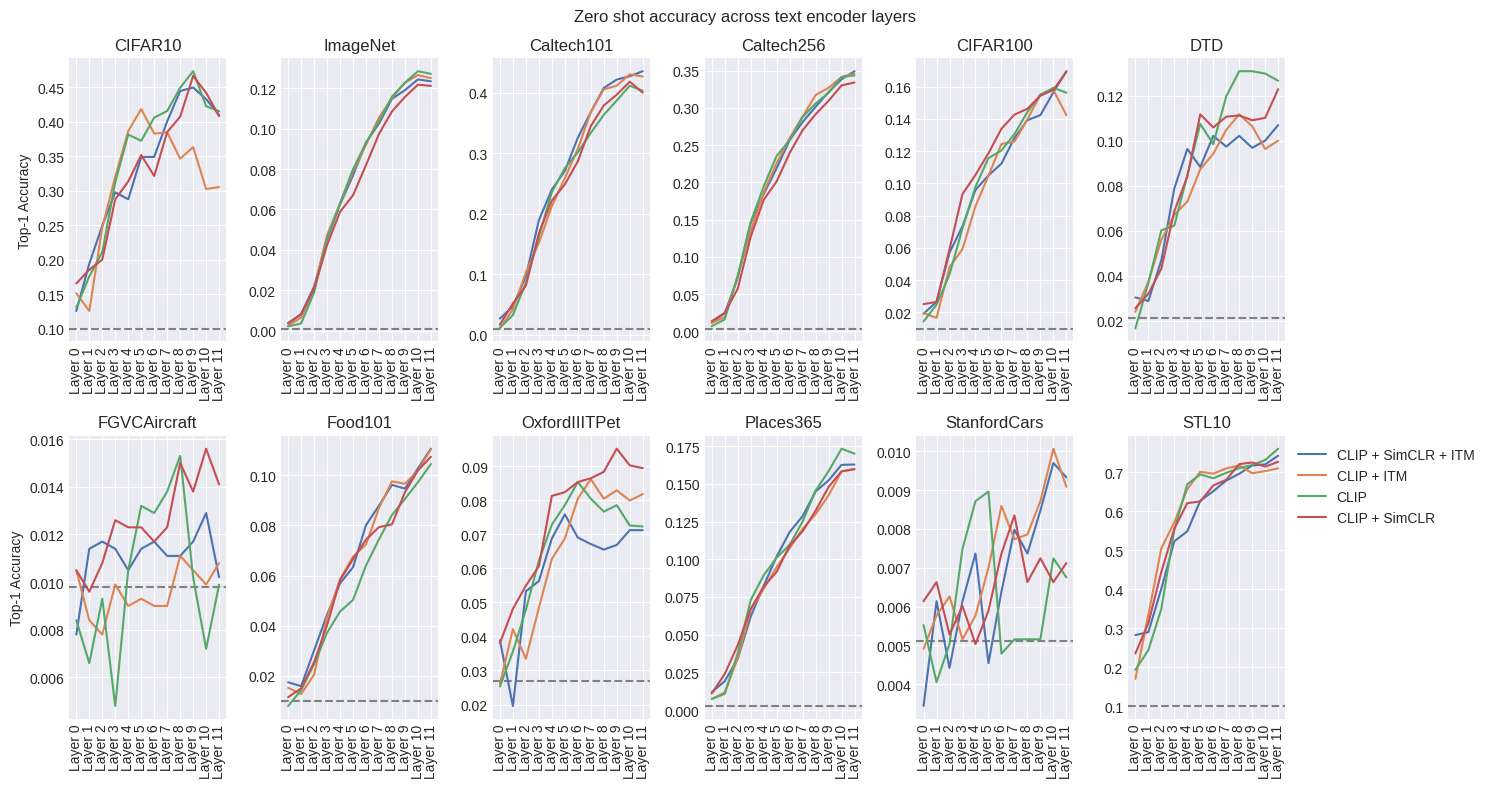

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
fig, axs = plt.subplots(2, 6, figsize=(15, 8))
dataset_name = "Caltech101"
fig.suptitle(f"Zero shot accuracy across text encoder layers")
ylabel = "Top-1 Accuracy"
axs[0, 0].set_ylabel(ylabel)
axs[1, 0].set_ylabel(ylabel)
colors = sns.color_palette("deep", 4)

baselines = {
    'ImageNet': 1/1000.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'DTD':1/47.,
    'OxfordIIITPet':1./37 ,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'Food101': 1./101,
    'STL10': 1./10,
    'Places365': 1./365,
}
width = 0.2
models_row = list(data.keys())
layers = [f"Layer {i}" for i in range(12)]

for sind, dataset in enumerate(data.keys()):
    axs.flat[sind].set_title(dataset)
    # axs.flat[sind].set_ylim(0, 1.0)
    axs.flat[sind].set_xticks(range(len(layers)), layers, rotation=90)
    axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    for idx, (model, y) in enumerate(data[dataset].items()):
        axs.flat[sind].plot(y, c=colors[idx], label=model)

# axs.flat[5].legend(frameon=True)
plt.legend(bbox_to_anchor=(1,1))
fig.tight_layout()

### Retrieval plots

In [38]:
import pandas as pd

def load_retrieval_scores(
        csv_path: str,
):
    scores = pd.read_csv(csv_path)
    # selected_scores = scores.loc[(scores["method"] == method) &
    #                             (scores["method_notes"] == method_notes) &
    #                             (scores["metric"] == metric)]
    # datasets = selected_scores["dataset"].unique()
    datasets = ["mscoco_captions", "flickr8k", "flickr30k"]
    # data_fractions = np.sort(selected_scores["dataset_fraction"].unique()) # sort fractions in ascending order
    data_fractions = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1", "1-aug", "1*"]
    # models = selected_scores["model_name"].unique()
    models = [model.split("_")[0] for model in scores["model"].unique()]
    # models = scores["model"].unique()
    metrics = [f"{modality}_retrieval_recall@{k}" for modality in ["image", "text"] for k in [1, 5, 10]]

    plotting_scores = {} # {dataset: {model: {image_retrieval: [scores from 0.05 to 1*], text_retrieval: [scores from 0.05 to 1*]}}}

    for dataset in datasets:
        plotting_scores[dataset] = {}
        for model in models:
            plotting_scores[dataset][model] = {}
            for metric in metrics:
                plotting_scores[dataset][model][metric] = []
                for fraction in data_fractions:
                    model_name = f"{model}_{fraction}"
                    try:
                        score = scores.loc[(scores["dataset"] == dataset) & 
                                        (scores["model"] == model_name), metric].item()
                    except:
                        print(f"Error: {dataset}, {model}, {fraction}")
                    plotting_scores[dataset][model][metric].append(score)
        #         model_scores[metric] = metric_scores
        #     dataset_scores[model] = model_scores
        # plotting_scores[dataset] = dataset_scores

    return plotting_scores

In [39]:
scores = load_retrieval_scores(
    "/home/phisch/multimodal/test_results/model_scores_retrieval.csv",
)

In [40]:
scores

{'mscoco_captions': {'CLIP-SimCLR': {'image_retrieval_recall@1': [0.0001999200321733,
    0.0001999200321733,
    0.0514994002878665,
    0.0852059200406074,
    0.1141143515706062,
    0.1386245489120483,
    0.1678128689527511,
    0.2125149965286255,
    0.2056377381086349],
   'image_retrieval_recall@5': [0.0009996001608669,
    0.0009996001608669,
    0.1632546931505203,
    0.2479008436203003,
    0.3052778840065002,
    0.3563774526119232,
    0.400479793548584,
    0.4655337929725647,
    0.4556577503681183],
   'image_retrieval_recall@10': [0.0019992003217339,
    0.0019992003217339,
    0.247860848903656,
    0.3545381724834442,
    0.4208316802978515,
    0.4830068051815033,
    0.5271491408348083,
    0.5952019095420837,
    0.5793282389640808],
   'text_retrieval_recall@1': [0.0001999999949475,
    0.0001999999949475,
    0.0824000015854835,
    0.1402000039815902,
    0.1979999989271164,
    0.2319999933242797,
    0.2673999965190887,
    0.3495999872684479,
    0.3283999

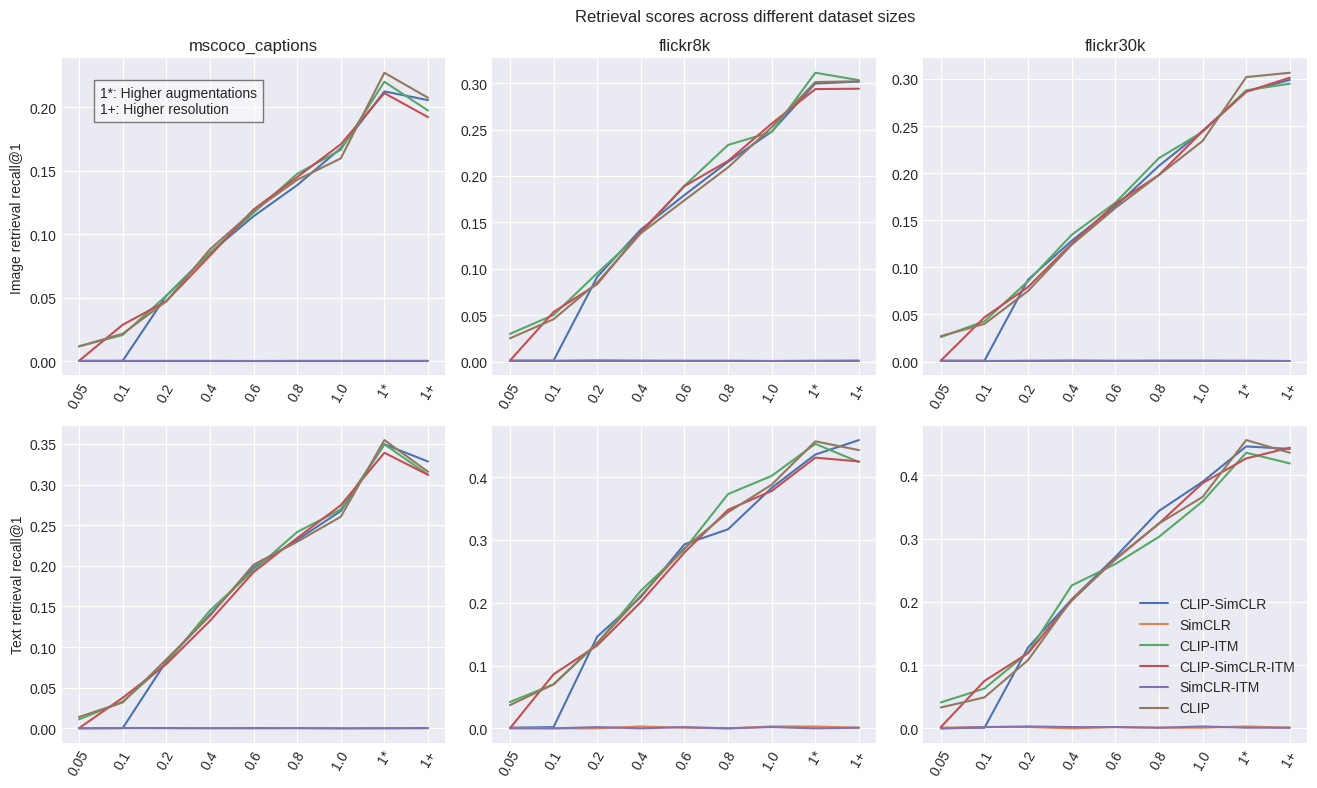

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

figtitle = "Retrieval scores across different dataset sizes"
ylabel = "Recall@1"
num_models = 6
colors = sns.color_palette("deep", num_models)
width = 0.2

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle(figtitle)
axs[0,0].set_ylabel("Image retrieval recall@1")
axs[1,0].set_ylabel("Text retrieval recall@1")
datasets = scores.keys()
dataset_sizes = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0", "1*", "1+"]
metrics = ["image_retrieval_recall@1", "text_retrieval_recall@1"]

for sind, dataset in enumerate(scores.keys()):
    axs[0, sind].set_title(dataset)
    for j, metric in enumerate(metrics):
        axs[j, sind].set_xticks(range(len(dataset_sizes)), dataset_sizes, rotation=60)
        for idx, (model, scores_for_metric) in enumerate(scores[dataset].items()):
            axs[j, sind].plot(scores_for_metric[metric], c=colors[idx], label=model)

# plt.legend(bbox_to_anchor=(1.05, 1))
# Move the legend outside the plot
# Add a legend to the empty space
# handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.5))
# fig.legend(loc='center', bbox_to_anchor=(0.85, 0.1, 0.1, 0.1))
plt.legend(bbox_to_anchor=(1, 0.5))
fig.text(0.07, 0.85, "1*: Higher augmentations\n1+: Higher resolution", bbox=dict(facecolor='white', alpha=0.5))

fig.tight_layout()        
# Adjust layout to make space for the legend
# fig.tight_layout(rect=[0, 0, 0.85, 1])
# fig.subplots_adjust(right=0.85, wspace=0.4)

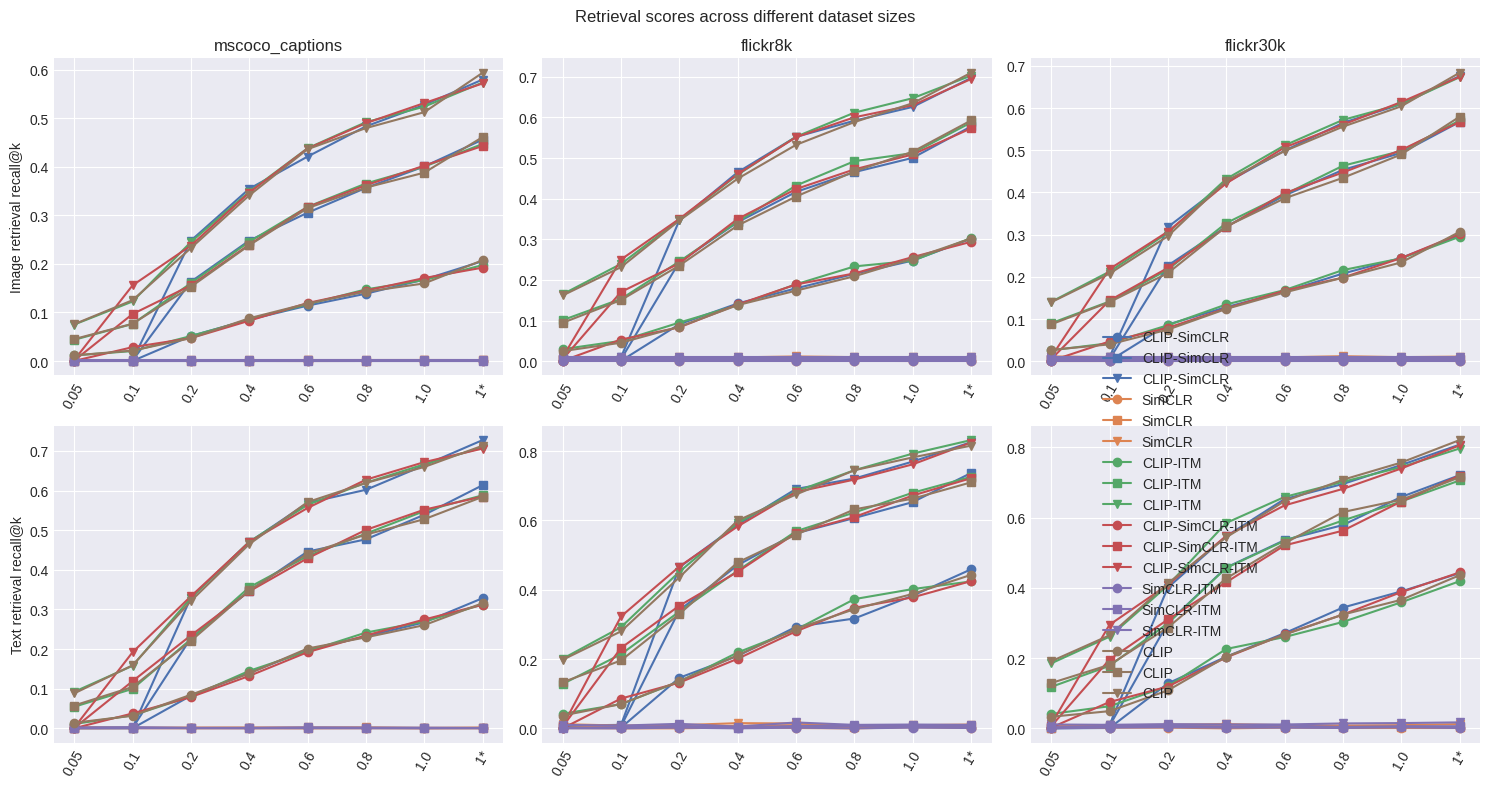

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

figtitle = "Retrieval scores across different dataset sizes"
ylabel = "Recall@1"
num_models = 6
colors = sns.color_palette("deep", num_models)
markers = ["o", "s", "v"]
width = 0.2

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle(figtitle)
axs[0,0].set_ylabel("Image retrieval recall@k")
axs[1,0].set_ylabel("Text retrieval recall@k")
datasets = scores.keys()
dataset_sizes = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0", "1*"]
metrics = [[f"image_retrieval_recall@{k}" for k in [1, 5, 10]], [f"text_retrieval_recall@{k}" for k in [1, 5, 10]]]

for sind, dataset in enumerate(scores.keys()):
    axs[0, sind].set_title(dataset)
    for j, metric in enumerate(metrics):
        axs[j, sind].set_xticks(range(len(dataset_sizes)), dataset_sizes, rotation=60)
        for idx, (model, scores_for_metric) in enumerate(scores[dataset].items()):
            for k, met in enumerate(metric):
                axs[j, sind].plot(scores_for_metric[met], c=colors[idx], marker=markers[k], label=model)

# plt.legend(bbox_to_anchor=(1.05, 1))
# Move the legend outside the plot
# Add a legend to the empty space
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.75, 0.1, 0.1, 0.1))
# fig.legend(loc='center', bbox_to_anchor=(0.85, 0.1, 0.1, 0.1))

fig.tight_layout()        
# Adjust layout to make space for the legend
# fig.tight_layout(rect=[0, 0, 0.85, 1])
# fig.subplots_adjust(right=0.85, wspace=0.4)

### General vs fine-grained datasets

#### Zero shot

In [9]:
import csv
from omegaconf import OmegaConf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
from utils import load_scores_per_dataset_all_models_all_fractions

scores = load_scores_per_dataset_all_models_all_fractions(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    metric="Top1Accuracy")

for dataset, model_scores in scores.items():
    model_scores.pop("SimCLR", 0)
    model_scores.pop("SimCLR + ITM", 0)

['0.05' '0.1' '0.2' '0.4' '0.6' '0.8' '1-aug' '1.0' '1.384']
Error: Caltech101, SimCLR, 0.05
Error: Caltech101, SimCLR, 0.1
Error: Caltech101, SimCLR + ITM, 0.05
Error: Caltech101, SimCLR + ITM, 0.1
Error: Caltech256, SimCLR, 0.05
Error: Caltech256, SimCLR, 0.1
Error: Caltech256, SimCLR + ITM, 0.05
Error: Caltech256, SimCLR + ITM, 0.1
Error: CIFAR10, SimCLR, 0.05
Error: CIFAR10, SimCLR, 0.1
Error: CIFAR10, SimCLR + ITM, 0.05
Error: CIFAR10, SimCLR + ITM, 0.1
Error: CIFAR100, SimCLR, 0.05
Error: CIFAR100, SimCLR, 0.1
Error: CIFAR100, SimCLR + ITM, 0.05
Error: CIFAR100, SimCLR + ITM, 0.1
Error: DTD, SimCLR, 0.05
Error: DTD, SimCLR, 0.1
Error: DTD, SimCLR + ITM, 0.05
Error: DTD, SimCLR + ITM, 0.1
Error: FGVCAircraft, SimCLR, 0.05
Error: FGVCAircraft, SimCLR, 0.1
Error: FGVCAircraft, SimCLR + ITM, 0.05
Error: FGVCAircraft, SimCLR + ITM, 0.1
Error: Food101, SimCLR, 0.05
Error: Food101, SimCLR, 0.1
Error: Food101, SimCLR + ITM, 0.05
Error: Food101, SimCLR + ITM, 0.1
Error: OxfordIIITPet, Sim

In [20]:
general_datasets = ["ImageNet", "Caltech101", "Caltech256", "CIFAR10", "CIFAR100", "STL10"]
fine_grained_datasets = ["Places365", "Food101", "OxfordIIITPet", "StanfordCars", "FGVCAircraft", "DTD"]
dataset_sizes = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0"]
models = list(scores["ImageNet"].keys())

general_mean_scores = {model: [] for model in models}
fine_grained_mean_scores = {model: [] for model in models}

for model in models:
    general_mean_scores[model] = [np.mean([scores[dataset][model][i] for dataset in general_datasets]) for i in range(len(dataset_sizes))]
    fine_grained_mean_scores[model] = [np.mean([scores[dataset][model][i] for dataset in fine_grained_datasets]) for i in range(len(dataset_sizes))]

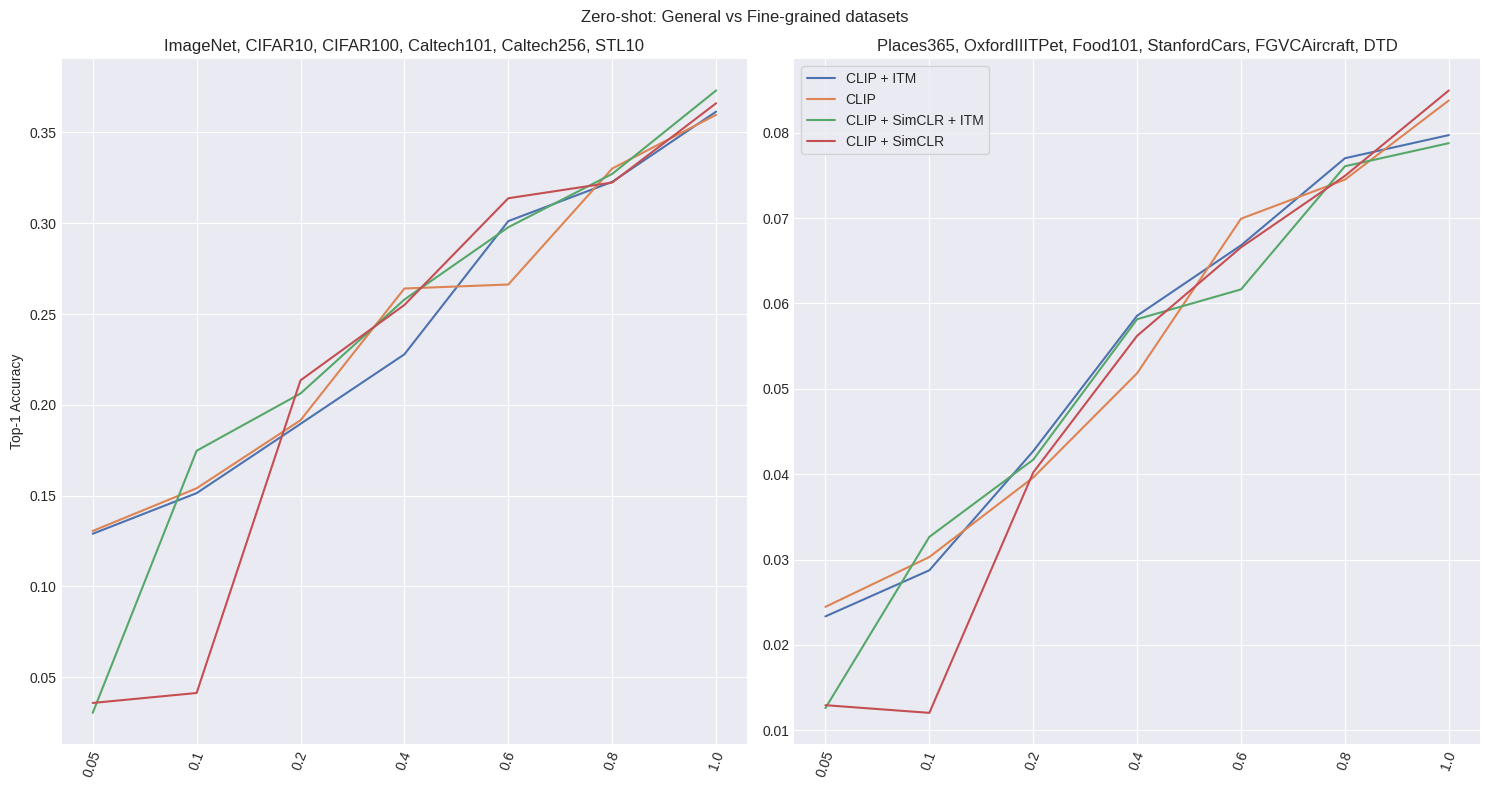

In [23]:
plt.style.use("seaborn-v0_8-darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle("Zero-shot: General vs Fine-grained datasets")
title_general = "ImageNet, CIFAR10, CIFAR100, Caltech101, Caltech256, STL10"
title_fine = "Places365, OxfordIIITPet, Food101, StanfordCars, FGVCAircraft, DTD"

ylabel = "Top-1 Accuracy"
axs[0].set_ylabel(ylabel)

colors = sns.color_palette("deep", 6)

DATASET_SIZES = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0"]

for pind, plot_data in enumerate([general_mean_scores, fine_grained_mean_scores]):
    axs.flat[pind].set_title(title_general if pind == 0 else title_fine)
    for idx, (model_name, scores) in enumerate(plot_data.items()):
        axs.flat[pind].plot(scores, label=model_name, c=colors[idx])
    axs.flat[pind].set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES, rotation=70)
    # axs.axhline(0.001,linestyle='dashed',color='gray')
    # axs.set_ylim(0.035, 0.15)

#plt.legend(bbox_to_anchor=(1,1))
axs.flat[1].legend(frameon=True)
fig.tight_layout()

#### Linear probe

In [34]:
import csv
from omegaconf import OmegaConf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import load_scores_per_dataset_all_models_all_fractions

scores = load_scores_per_dataset_all_models_all_fractions(
    "/home/phisch/multimodal/test_results/model_scores_linear_probe.csv",
    method="linear",
    method_notes="last_image_layer",
    metric="Top1Accuracy")

['0.05' '0.1' '0.2' '0.4' '0.6' '0.8' '1-aug' '1.0' '1.384']


In [36]:
general_datasets = ["ImageNet-100-0.1", "ImageNet-100-0.01", "Caltech101", "Caltech256", "CIFAR10", "CIFAR100", "STL10"]
fine_grained_datasets = ["Places365", "Food101", "OxfordIIITPet", "StanfordCars", "FGVCAircraft", "DTD"]
dataset_sizes = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0"]
models = list(scores["Caltech101"].keys())

general_mean_scores = {model: [] for model in models}
fine_grained_mean_scores = {model: [] for model in models}

for model in models:
    general_mean_scores[model] = [np.mean([scores[dataset][model][i] for dataset in general_datasets]) for i in range(len(dataset_sizes))]
    fine_grained_mean_scores[model] = [np.mean([scores[dataset][model][i] for dataset in fine_grained_datasets]) for i in range(len(dataset_sizes))]

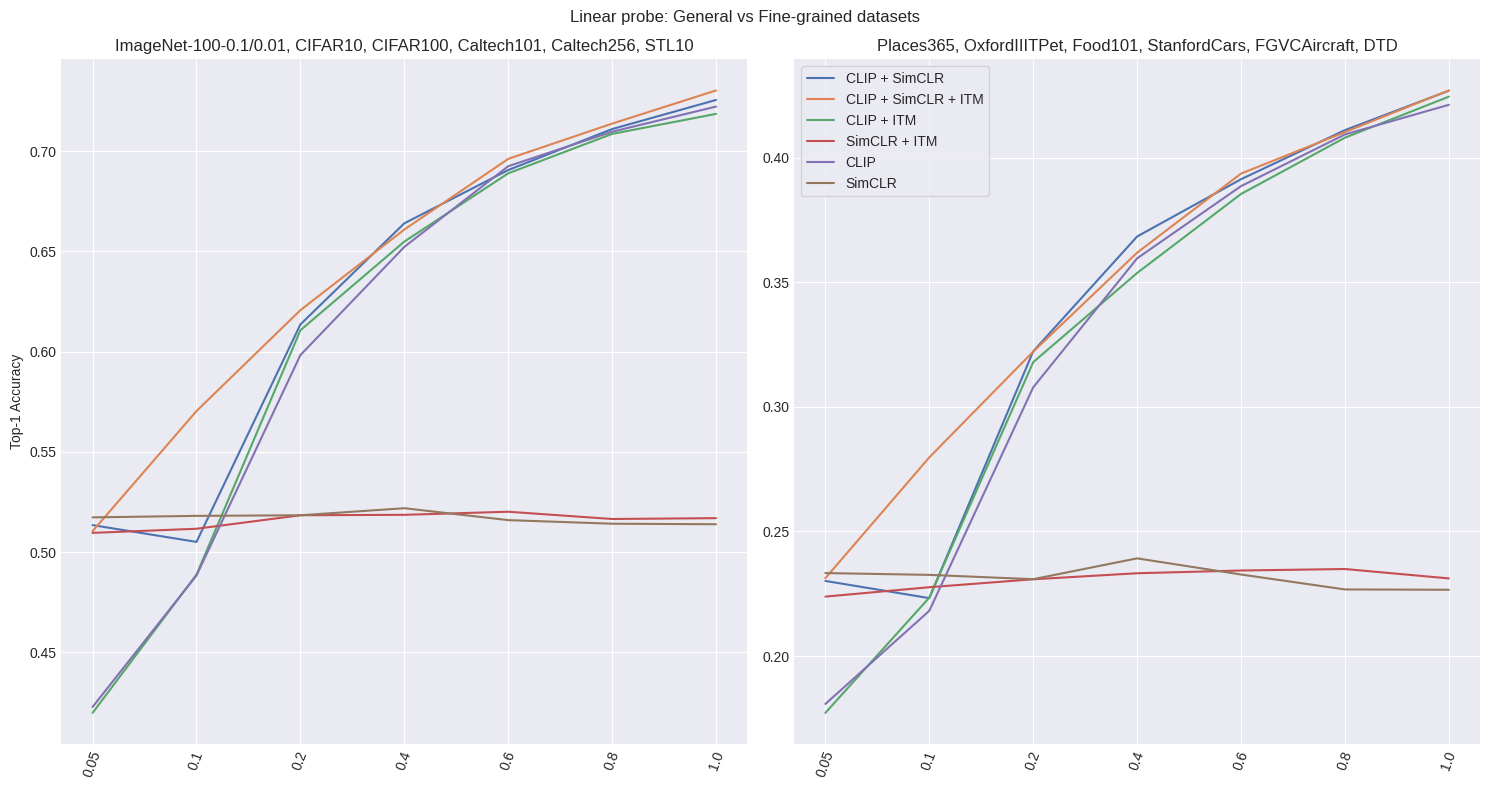

In [37]:
plt.style.use("seaborn-v0_8-darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle("Linear probe: General vs Fine-grained datasets")
title_general = "ImageNet-100-0.1/0.01, CIFAR10, CIFAR100, Caltech101, Caltech256, STL10"
title_fine = "Places365, OxfordIIITPet, Food101, StanfordCars, FGVCAircraft, DTD"

ylabel = "Top-1 Accuracy"
axs[0].set_ylabel(ylabel)

colors = sns.color_palette("deep", 6)

DATASET_SIZES = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0"]

for pind, plot_data in enumerate([general_mean_scores, fine_grained_mean_scores]):
    axs.flat[pind].set_title(title_general if pind == 0 else title_fine)
    for idx, (model_name, scores) in enumerate(plot_data.items()):
        axs.flat[pind].plot(scores, label=model_name, c=colors[idx])
    axs.flat[pind].set_xticks(range(len(DATASET_SIZES)), DATASET_SIZES, rotation=70)
    # axs.axhline(0.001,linestyle='dashed',color='gray')
    # axs.set_ylim(0.035, 0.15)

#plt.legend(bbox_to_anchor=(1,1))
axs.flat[1].legend(frameon=True)
fig.tight_layout()